# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Jasmine Kinasih
- Email: jasminekinasih10@gmail.com
- Id Dicoding:jasmine_kinasih

# Import Library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import math

from scipy.stats import chi2_contingency, pearsonr, f_oneway

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter # For SMOTE
from sqlalchemy import create_engine # For database connection

# Data Understanding

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv", delimiter=";")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Marital_status,1,1,1,1,2,2,1,1,1,1
Application_mode,17,15,1,17,39,39,1,18,1,1
Application_order,5,1,5,2,1,1,1,4,3,1
Course,171,9254,9070,9773,8014,9991,9500,9254,9238,9238
Daytime_evening_attendance,1,1,1,1,0,0,1,1,1,1
Previous_qualification,1,1,1,1,1,19,1,1,1,1
Previous_qualification_grade,122.0,160.0,122.0,122.0,100.0,133.1,142.0,119.0,137.0,138.0
Nacionality,1,1,1,1,1,1,1,1,62,1
Mothers_qualification,19,1,37,38,37,37,19,37,1,1
Fathers_qualification,12,3,37,37,38,37,38,37,1,19


In [10]:
df.to_csv("data.csv", index=False)
#Simpan data untuk di Metabase

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Insight:

| Tipe Variabel             | Contoh Kolom                                                                                 | Keterangan                                                                    |
| ------------------------- | -------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Numerik Murni**         | `Admission_grade`, `Age_at_enrollment`, `Curricular_units_1st_sem_grade`, `GDP`              | Perlu dilakukan normalisasi/skaling jika menggunakan algoritma sensitif skala |
| **Kategorikal (Encoded)** | `Gender`, `Marital_status`, `Course`, `Daytime_evening_attendance`, `Previous_qualification` | Sudah berupa integer, tetapi merepresentasikan kategori tertentu              |
| **Target**                | `Status`                                                                                     | Perlu diubah menjadi label biner untuk keperluan klasifikasi                  |


## Cek Missing value

In [13]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


## Cek Duplikasi

In [14]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


## Variabel target

 Kolom `Status` adalah target prediksi kita. Kolom ini berisi nilai seperti 'Dropout', 'Enrolled', dan 'Graduate'. Untuk model prediksi, kita perlu mengubahnya menjadi format numerik. Kita akan fokus pada masalah klasifikasi biner: Dropout (1) vs Tidak Dropout (0)

In [15]:
df["Status"].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


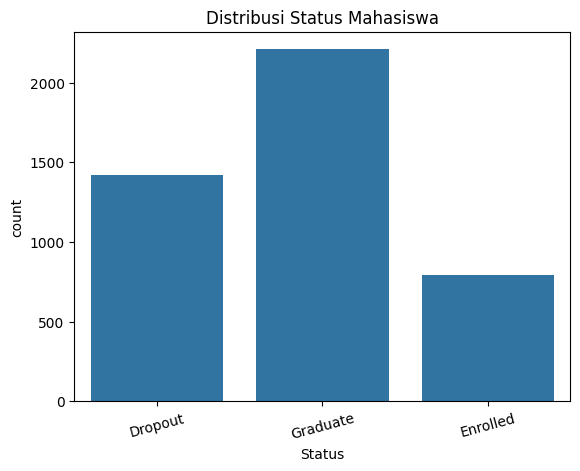

In [16]:
sns.countplot(data=df, x="Status")
plt.title("Distribusi Status Mahasiswa")
plt.xticks(rotation=15)
plt.show()

Insight:
Kolom `Status` → berisi status akhir mahasiswa, kita dapat melihat distribusi sebagai berikut:
* **Graduate:** 2209 mahasiswa
* **Dropout:** 1421 mahasiswa
* **Enrolled:** 794 mahasiswa

Menyelesaikan masalah data imbalance dengan mengubah masalah klasifikasi multikelas (Dropout, Enrolled, Graduate) menjadi klasifikasi biner yang lebih sederhana.

In [17]:
clean_df = df.copy()
clean_df['Status_Binary'] = clean_df['Status'].replace({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 1
})

<ipython-input-17-3295087130>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df['Status_Binary'] = clean_df['Status'].replace({


In [18]:
dropout_counts = clean_df['Status_Binary'].value_counts()
dropout_counts

,count
Status_Binary,
1,3003
0,1421


## Label Encoding

In [19]:
encoding_df = df.copy()
encoding_df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [20]:
def label_decoding(df, feature):
    category_mappings = {
        'Marital_status': {
            1: 'Single',
            2: 'Married',
            3: 'Widower',
            4: 'Divorced',
            5: 'Facto Union',
            6: 'Legally Seperated'
        },
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Daytime_evening_attendance'  : {0: 'Evening', 1: 'Daytime'},
        'Gender'                      : {0: 'Female', 1: 'Male'},
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        '''
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)
        '''

    return df

In [21]:
encoding_df = label_decoding(encoding_df, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

encoding_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Fungsi Dekodifikasi Label Kategorikal**

Fungsi `label_decoding` ini dirancang untuk mengubah representasi data kategorikal dari format numerik menjadi label teks yang dapat diinterpretasikan secara langsung. Proses dekodifikasi ini memiliki tujuan utama untuk meningkatkan keterbacaan data selama analisis.

Mekanisme kerja fungsi ini adalah sebagai berikut:
1.  **Pemetaan Referensi:** Mengutilisasi `dictionary` bernama `category_mappings` yang berfungsi sebagai kamus untuk menerjemahkan setiap kode numerik ke label teks yang relevan.
2.  **Substitusi Nilai:** Menggunakan metode `.map()` dari pustaka Pandas untuk melakukan substitusi nilai pada setiap kolom fitur yang ditentukan.
3.  **Efisiensi Pemetaan:** Menerapkan kembali pemetaan yang sama untuk fitur-fitur dengan struktur kode yang identik (misalnya, `Mothers_qualification` dan `Fathers_qualification`) guna menjaga efisiensi kode.

Langkah dekodifikasi ini merupakan tahap persiapan fundamental untuk Analisis Data Eksploratif (EDA). Namun, perlu dicatat bahwa kumpulan fitur yang telah didekodifikasi ini akan menjadi subjek seleksi lebih lanjut. Hanya fitur-fitur kategorikal yang menunjukkan korelasi signifikan atau dianggap relevan berdasarkan analisis berikutnya yang akan disertakan dalam tahap EDA.

## Cek korelasi

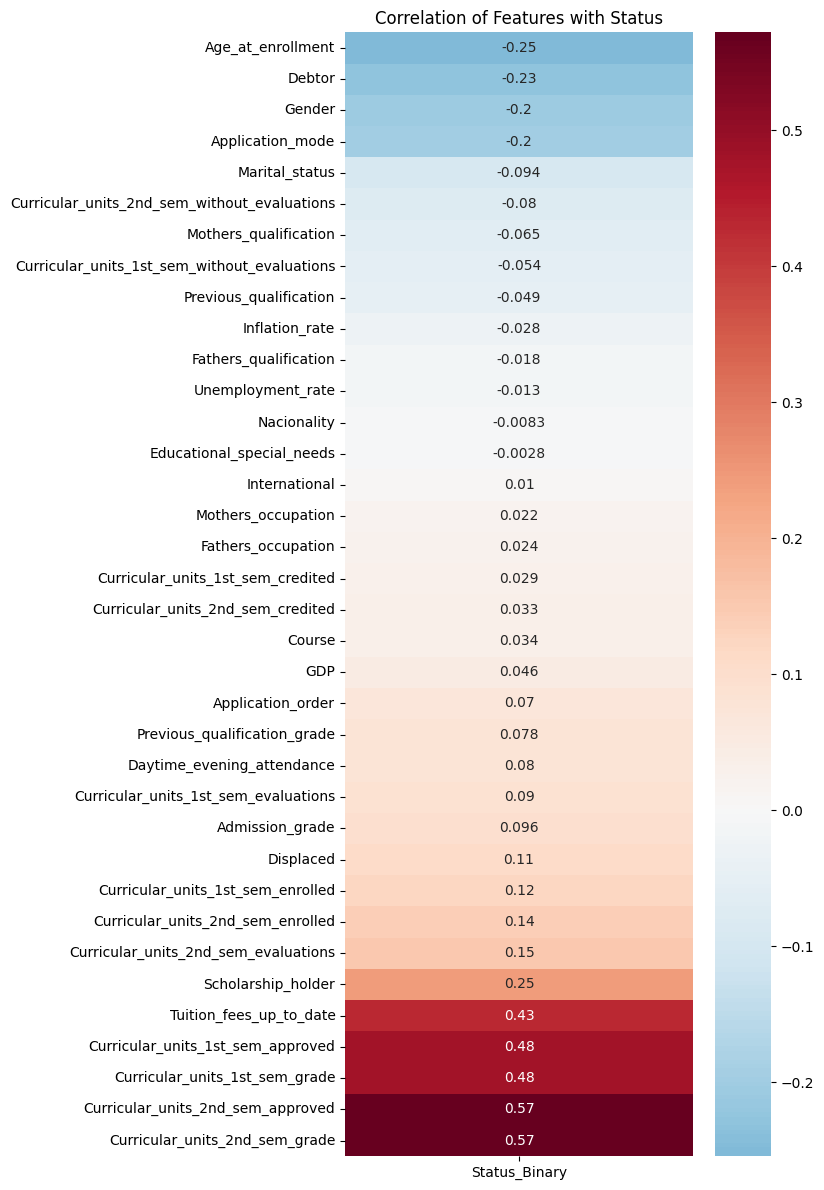

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_target = clean_df.corr(numeric_only=True)['Status_Binary'].drop('Status_Binary')

# Buat plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(
    correlation_with_target.sort_values().to_frame(),
    annot=True,
    cmap='RdBu_r',
    center=0
)
plt.title("Correlation of Features with Status")
plt.tight_layout()
plt.show()

Insight:

**Kelompok 1: Performa Akademik & Finansial (Pendorong Keberhasilan)**

Fitur-fitur ini berkorelasi positif kuat, artinya **semakin tinggi nilainya, semakin tinggi kemungkinan mahasiswa untuk Lulus**.

* **`Curricular_units_1st/2nd_sem_grade` & `Curricular_units_1st/2nd_sem_approved`**: Ini adalah indikator paling jelas. Mahasiswa yang mendapatkan **nilai bagus** dan **menyelesaikan banyak SKS** di awal perkuliahan memiliki momentum dan fondasi akademik yang kuat. Mereka cenderung lebih termotivasi dan lebih mungkin untuk terus berhasil hingga lulus.
* **`Tuition_fees_up_to_date`**: Mahasiswa yang **membayar UKT tepat waktu** kemungkinan besar memiliki stabilitas finansial. Ini menghilangkan salah satu sumber stres terbesar yang seringkali memaksa mahasiswa untuk berhenti kuliah. Ini juga bisa menjadi proksi dari kedisiplinan dan komitmen mahasiswa.
* **`Scholarship_holder`**: Penerima beasiswa memiliki dua keuntungan besar: **dukungan finansial** yang mengurangi beban ekonomi dan **validasi akademis**. Mereka seringkali adalah mahasiswa berprestasi yang memiliki motivasi internal yang tinggi dan "beban moral" untuk menyelesaikan studi dengan baik.

**Insight Utama**: Keberhasilan akademik di semester awal dan stabilitas finansial adalah prediktor kesuksesan yang paling kuat. Intervensi dini pada mahasiswa yang menunjukkan nilai rendah atau SKS yang tidak tuntas di semester pertama sangatlah krusial.

**Kelompok 2: Demografi & Faktor Risiko (Pendorong Kegagalan)**

Fitur-fitur ini berkorelasi negatif kuat, artinya **semakin tinggi nilainya, semakin tinggi kemungkinan mahasiswa untuk Dropout**.

* **`Age_at_enrollment`**: Mahasiswa yang **lebih tua saat mendaftar** memiliki risiko dropout yang lebih tinggi. Ini bisa disebabkan oleh banyak faktor: mereka mungkin sudah memiliki tanggung jawab lain (pekerjaan, keluarga), kesenjangan waktu sejak pendidikan terakhir, atau kesulitan beradaptasi dengan lingkungan kampus yang didominasi oleh usia yang lebih muda.
* **`Debtor`**: Status sebagai **penunggak utang (Debtor)** adalah sinyal bahaya finansial yang sangat jelas. Kesulitan ekonomi adalah salah satu alasan paling umum mahasiswa terpaksa berhenti kuliah.
* **`Gender`**: Korelasi negatif ini perlu interpretasi hati-hati berdasarkan pengkodean. Dari data README.md terdapat keterangan `0 = Wanita` dan `1 = Pria`, korelasi negatif berarti bahwa saat nilai berubah dari 0 ke 1 (yaitu, Pria), kemungkinan untuk lulus (`Status_Binary=1`) menurun. Artinya, dalam dataset ini, **mahasiswa pria memiliki risiko dropout yang lebih tinggi** dibandingkan mahasiswa wanita.
* **`Application_mode`**: Sama seperti `Gender`, ini bergantung pada nilai kodenya. Korelasi negatif menunjukkan bahwa **semakin tinggi nilai kode mode pendaftaran, semakin tinggi risiko dropout**. Biasanya, mode pendaftaran dengan jalur nontradisional (misalnya, transfer, di atas 23 tahun) memiliki kode numerik yang lebih tinggi dibandingkan jalur umum reguler. Mahasiswa dari jalur ini mungkin menghadapi tantangan adaptasi yang lebih besar.

---



In [41]:
# Membuat salinan dari encoding_df untuk tujuan EDA
eda_df = encoding_df.copy()

# Menambahkan kolom 'Status_Binary' dari DataFrame clean_df
eda_df['Status_Binary'] = clean_df['Status_Binary']

if 'Status' in eda_df.columns:
    eda_df = eda_df.drop('Status', axis=1)

eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_Binary
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


## Encoding Categorial

In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Definisikan daftar kolom fitur yang relevan
important_categorical = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
important_numerical = [
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
    'Debtor'
]

important_features = important_categorical + important_numerical

selected_features_df = clean_df[important_features + ['Status_Binary']].copy()

### Buat Model Encoding

In [28]:
# One-Hot Encoding hanya untuk fitur kategorikal
encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(selected_features_df[important_categorical])
encoded_cat_cols = encoder.get_feature_names_out(important_categorical)

# Buat DataFrame hasil encoding dengan index yang sama
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols, index=selected_features_df.index)

# Gabungkan fitur numerik + hasil encoding + target
df_final = pd.concat([
    selected_features_df[important_numerical],
    encoded_df,
    selected_features_df['Status_Binary']
], axis=1)

In [29]:
df_final.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Application_mode_2,Application_mode_5,...,Previous_qualification_12,Previous_qualification_14,Previous_qualification_15,Previous_qualification_19,Previous_qualification_38,Previous_qualification_39,Previous_qualification_40,Previous_qualification_42,Previous_qualification_43,Status_Binary
0,0,0.000000,0,0.000000,1,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,13.666667,6,14.000000,0,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000000,0,0.000000,0,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,12.400000,6,13.428571,1,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,13.000000,5,12.333333,1,0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# Simpan Model Encoding
joblib.dump(encoder, 'onehot_encoder2.pkl')

['onehot_encoder2.pkl']

Penjelasan:
kode tersebut bertujuan untuk **mempersiapkan data agar siap digunakan oleh model machine learning** dengan melakukan transformasi pada fitur-fitur pilihan.
Bberikut adalah alur kerjanya:

1.  **Seleksi Fitur**: Kode pertama-tama memilih hanya fitur-fitur (kolom) yang dianggap paling penting berdasarkan analisis korelasi sebelumnya, yang terdiri dari fitur numerik dan kategorikal.

2.  **One-Hot Encoding**: Fitur kategorikal (seperti 'Course' atau 'Gender') yang masih berupa angka atau teks diubah menjadi format numerik biner (0 dan 1). Proses ini menciptakan kolom-kolom baru untuk setiap kategori, sehingga model dapat memahami hubungan antar kategori tanpa mengasumsikan urutan.

3.  **Penggabungan Final**: Data akhir (`df_final`) dibentuk dengan menggabungkan tiga bagian: fitur numerik asli, fitur kategorikal yang sudah di-OneHot-Encode, dan kolom target ('Status_Binary').

4.  **Penyimpanan Encoder**: Model `encoder` yang telah "belajar" cara mengubah data kategorikal disimpan ke dalam file `encoder2.pkl`. Ini sangat penting agar nantinya data baru dapat diproses dengan cara yang sama persis saat akan melakukan prediksi.

## Outlier

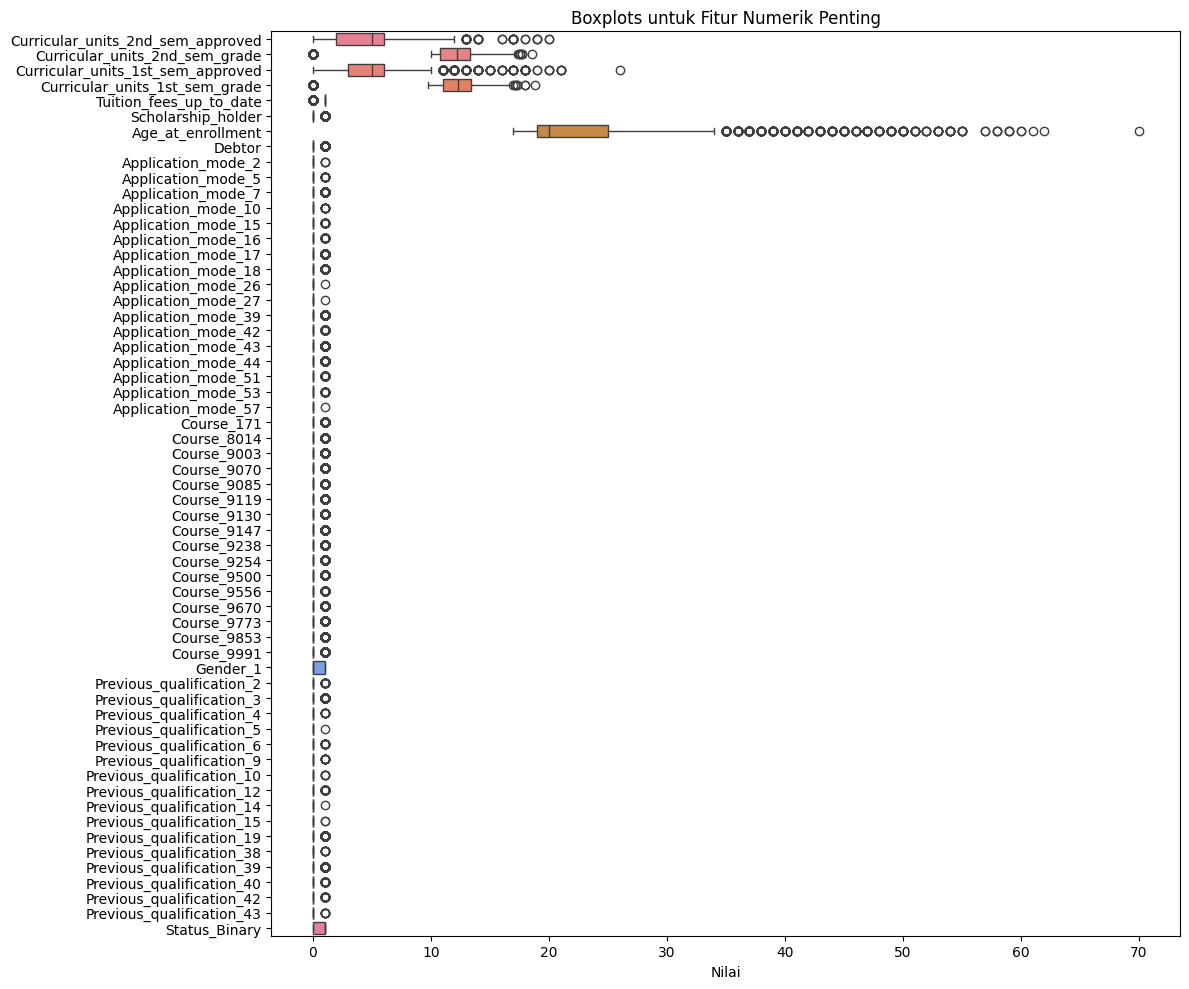

In [31]:
selected_df = df[important_features].copy()

plt.figure(figsize=(12, 10))
sns.boxplot(data=df_final, orient='h')
plt.title("Boxplots untuk Fitur Numerik Penting")
plt.xlabel("Nilai")
plt.tight_layout()
plt.show()

**Analisis Rinci per Kelompok Fitur**

1. Kelompok Fitur Demografis (`Age_at_enrollment`)

* **Observasi**: Ini adalah fitur dengan outlier yang paling jelas dan signifikan. Sebagian besar data (kotak dan garis) terkonsentrasi pada rentang usia muda, sekitar 18-23 tahun, yang merupakan usia tipikal mahasiswa baru.
* **Outlier**: Terdapat banyak titik outlier di sisi atas, yang mewakili mahasiswa yang mendaftar pada usia jauh lebih tua, mulai dari 30-an, 40-an, hingga bahkan mendekati 70 tahun.

2. Kelompok Fitur Akademik (`Curricular_units...`)

* **Observasi**: Pada keempat fitur akademik (`..._approved` dan `..._grade` untuk semester 1 & 2), kita melihat pola yang serupa. Terdapat konsentrasi data yang besar pada nilai 0.
* **Outlier**:
    * Untuk `..._approved`, terdapat beberapa outlier di sisi atas, menunjukkan ada mahasiswa yang berhasil menyelesaikan jumlah SKS jauh lebih banyak dari rata-rata.
    * Untuk `..._grade`, tidak ada outlier yang signifikan di sisi atas, karena nilai dibatasi hingga 20.
* **Interpretasi**: Titik-titik pada nilai 0, meskipun secara statistik terpisah, mewakili kelompok mahasiswa yang sangat penting: mereka yang **tidak lulus satu SKS pun** atau tidak mengikuti evaluasi sama sekali di semester tersebut. Ini adalah sinyal kuat potensi masalah akademik.

3. Kelompok Fitur Biner (`Tuition_fees_up_to_date`, `Scholarship_holder`, `Debtor`)

* **Observasi**: Fitur-fitur ini hanya memiliki dua nilai (0 atau 1), sehingga konsep "outlier" tradisional tidak sepenuhnya berlaku. Box plot ini lebih berfungsi untuk menunjukkan distribusi.
* **Interpretasi**:
    * **`Tuition_fees_up_to_date`**: Mayoritas mahasiswa (nilai 1) membayar UKT tepat waktu.
    * **`Scholarship_holder`**: Mayoritas mahasiswa (nilai 0) bukan penerima beasiswa.
    * **`Debtor`**: Mayoritas mahasiswa (nilai 0) tidak memiliki tunggakan utang.
    * Visualisasi ini mengonfirmasi bahwa pada fitur-fitur finansial ini, ada kelompok minoritas yang perilakunya berbeda (menunggak, tidak dapat beasiswa, dll.), yang sesuai dengan temuan korelasi sebelumnya.


# EDA

In [32]:
selected_features_df.describe(include='all')

,Application_mode,Course,Gender,Previous_qualification,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Status_Binary
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,8856.642631,0.351718,4.577758,4.435805,10.230206,4.706600,10.640822,0.880651,0.248418,23.265145,0.113698,0.678797
std,17.484682,2063.566416,0.477560,10.216592,3.014764,5.210808,3.094238,4.843663,0.324235,0.432144,7.587816,0.317480,0.466991
min,1.000000,33.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,1.000000,9085.000000,0.000000,1.000000,2.000000,10.750000,3.000000,11.000000,1.000000,0.000000,19.000000,0.000000,0.000000
50%,17.000000,9238.000000,0.000000,1.000000,5.000000,12.200000,5.000000,12.285714,1.000000,0.000000,20.000000,0.000000,1.000000
75%,39.000000,9556.000000,1.000000,1.000000,6.000000,13.333333,6.000000,13.400000,1.000000,0.000000,25.000000,0.000000,1.000000
max,57.000000,9991.000000,1.000000,43.000000,20.000000,18.571429,26.000000,18.875000,1.000000,1.000000,70.000000,1.000000,1.000000


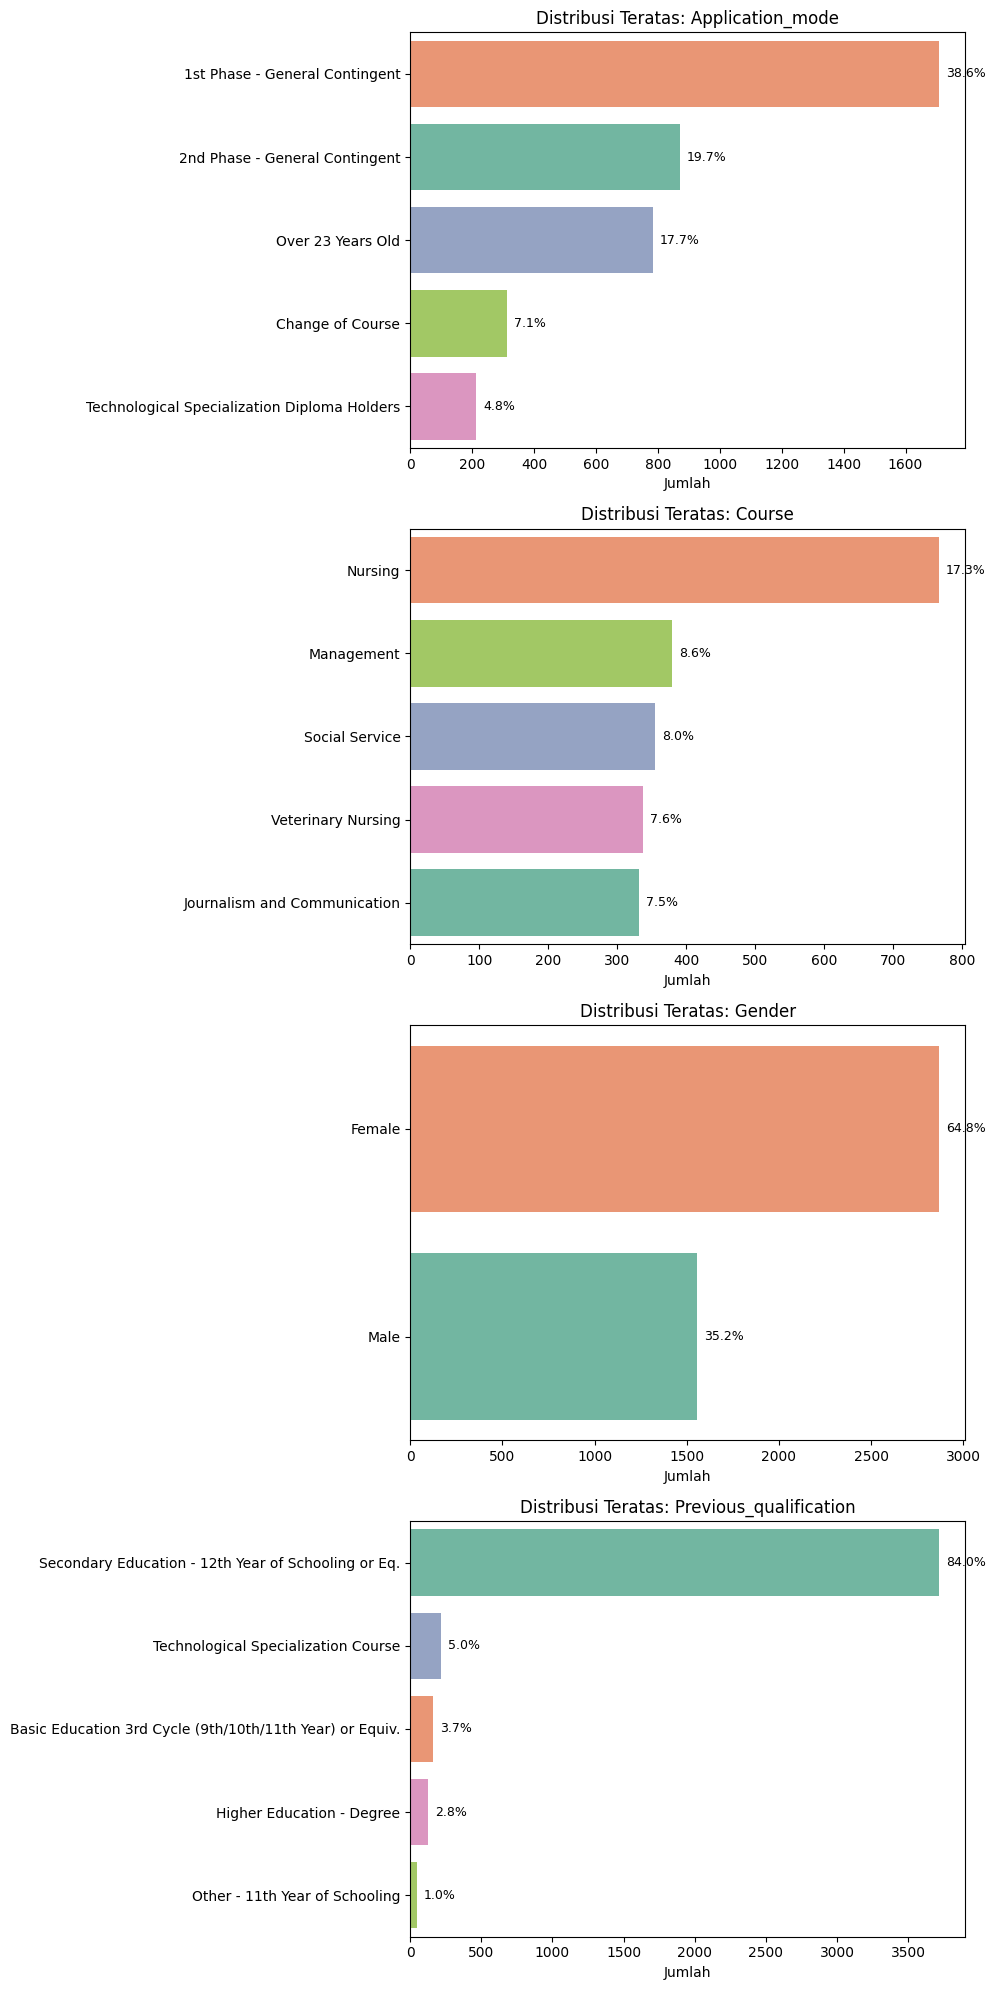

In [36]:
n = len(important_categorical)
fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n))

if n == 1:
    axes = [axes]

for i, col in enumerate(important_categorical):
    ax = axes[i]

    top5 = encoding_df[col].value_counts().nlargest(5)
    order = top5.index
    filtered_df = encoding_df[encoding_df[col].isin(order)]

    sns.countplot(
        data=filtered_df,
        y=col,
        ax=ax,
        order=order,
        palette="Set2",
        hue=col,
        legend=False
    )

    total = len(encoding_df)

    for p in ax.patches:
        width = p.get_width()
        percent = f"{(width / total) * 100:.1f}%"

        ax.annotate(percent,
                    (width, p.get_y() + p.get_height() / 2.),
                    ha='left',
                    va='center',
                    fontsize=9,
                    color='black',
                    xytext=(5, 0),
                    textcoords='offset points')

    ax.set_title(f"Distribusi Teratas: {col}")
    ax.set_xlabel("Jumlah")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

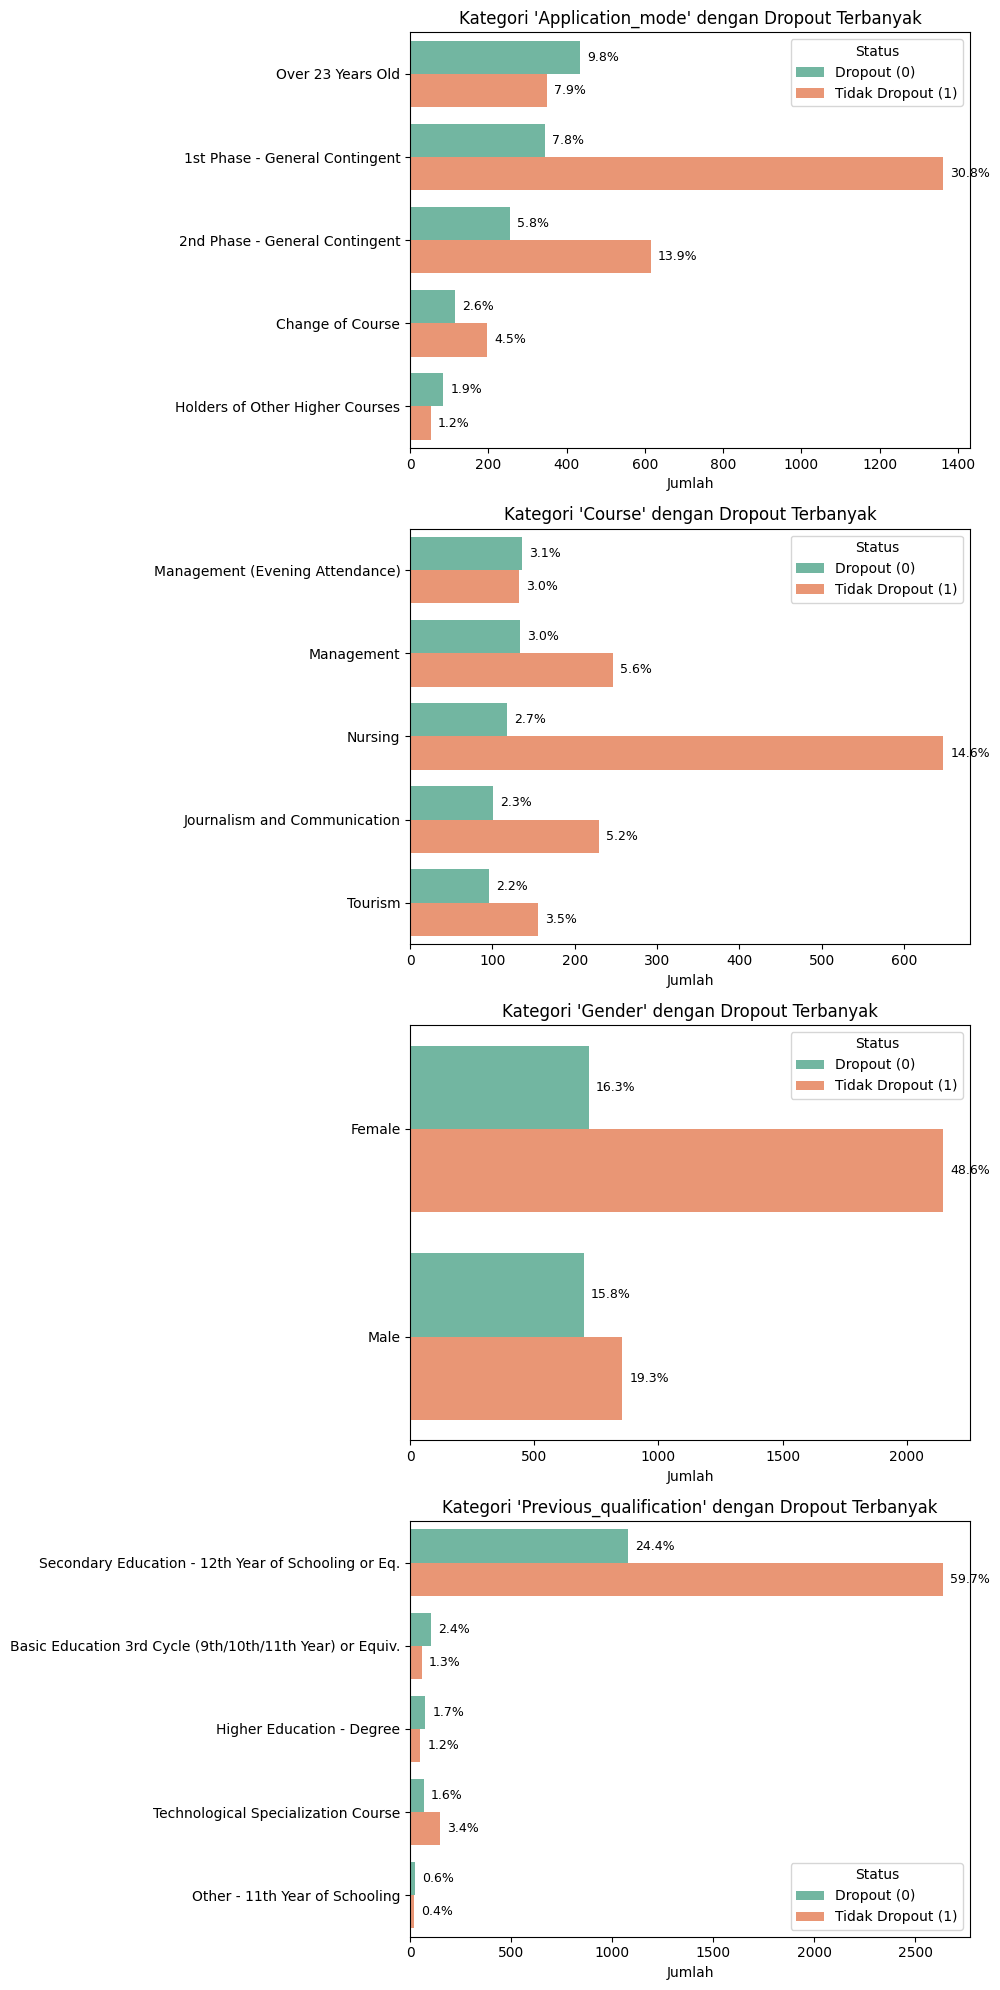

In [45]:
dropout_df = eda_df[eda_df['Status_Binary'] == 0]

n = len(important_categorical)
fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n))

if n == 1:
    axes = [axes]

for i, col in enumerate(important_categorical):
    ax = axes[i]

    top5_dropout = dropout_df[col].value_counts().nlargest(5)
    top5_cats = top5_dropout.index

    filtered_df = eda_df[eda_df[col].isin(top5_cats)]

    sns.countplot(data=filtered_df, y=col, ax=ax, order=top5_cats, palette="Set2", hue='Status_Binary')

    for p in ax.patches:
        width = p.get_width()
        if width == 0:
            continue

        total = len(eda_df)
        percent = f"{(width / total) * 100:.1f}%"

        ax.annotate(percent,
                    (width, p.get_y() + p.get_height() / 2.),
                    ha='left',
                    va='center',
                    fontsize=9,
                    color='black',
                    xytext=(5, 0),
                    textcoords='offset points')

    ax.set_title(f"Kategori '{col}' dengan Dropout Terbanyak")

    ax.set_xlabel("Jumlah")
    ax.set_ylabel("")

    ax.legend(title="Status", labels=["Dropout (0)", "Tidak Dropout (1)"])

plt.tight_layout()
plt.show()

Insight:
**1. Jalur Pendaftaran (`Application_mode`)**

* **Fakta Kuantitatif:** Jalur pendaftaran **"1st Phase - General Contingent"** memiliki jumlah *dropout* tertinggi secara absolut. Ini wajar karena jalur ini memiliki jumlah mahasiswa terbanyak secara keseluruhan.
* **Insight Kualitatif:** Perhatikan kategori **"Over 23 Years Old"**. Meskipun jumlah total mahasiswanya lebih sedikit daripada jalur "1st Phase", rasio antara bar *dropout* (oranye) dan tidak *dropout* (hijau) terlihat jauh lebih tinggi. Ini mengindikasikan bahwa **mahasiswa yang mendaftar pada usia di atas 23 tahun memiliki *tingkat* atau *risiko* dropout yang lebih tinggi secara proporsional** dibandingkan mahasiswa dari jalur umum.

**2. Program Studi (`Course`)**

* **Fakta Kuantitatif:** Program studi **"Social Service (Evening)"** dan **"Nursing"** menjadi penyumbang jumlah *dropout* terbanyak.
* **Insight Kualitatif:** Di sinilah *insight* paling tajam terlihat.
    * Pada prodi **"Social Service (Evening)"**, bar *dropout* (oranye) hampir sama tingginya dengan bar tidak *dropout* (hijau). Ini adalah sinyal bahaya yang sangat kuat, menunjukkan bahwa **hampir separuh mahasiswa di program studi ini mengalami *dropout***. Tingkat putus studinya sangat tinggi.
    * Bandingkan dengan prodi **"Nursing"** atau **"Management"**, di mana bar tidak *dropout* (hijau) jauh lebih dominan. Meskipun jumlah absolut *dropout* di prodi Nursing tinggi, tingkat *dropout*-nya secara proporsional jauh lebih rendah daripada "Social Service (Evening)".

**3. Jenis Kelamin (`Gender`)**

* **Fakta Kuantitatif:** Jumlah absolut mahasiswa *dropout* antara **perempuan (Female)** dan **laki-laki (Male)** hampir seimbang (sekitar 4.9% vs 4.7% dari total populasi).
* **Insight Kualitatif:** Ini adalah temuan yang sangat signifikan. Mengingat dari analisis sebelumnya bahwa jumlah total mahasiswa perempuan hampir dua kali lipat dari laki-laki, namun jumlah *dropout*-nya hampir sama, ini secara visual mengonfirmasi bahwa **tingkat *dropout* pada mahasiswa laki-laki jauh lebih tinggi**. Seorang mahasiswa laki-laki, secara proporsional, lebih berisiko untuk *dropout* daripada seorang mahasiswi.

**4. Kualifikasi Pendidikan Sebelumnya (`Previous_qualification`)**

* **Fakta Kuantitatif:** Sebagian besar *dropout* (sekitar 27.6% dari total populasi) berasal dari mahasiswa dengan latar belakang **"Secondary Education"**.
* **Insight Kualitatif:** Temuan ini kurang memberikan *insight* baru karena hampir semua mahasiswa (sekitar 85%) berasal dari latar belakang ini. Grafik ini lebih berfungsi sebagai konfirmasi bahwa masalah *dropout* terkonsentrasi pada kelompok demografis utama. Tidak terlihat adanya risiko yang lebih tinggi secara proporsional pada kategori kualifikasi lainnya karena jumlahnya yang sangat kecil.


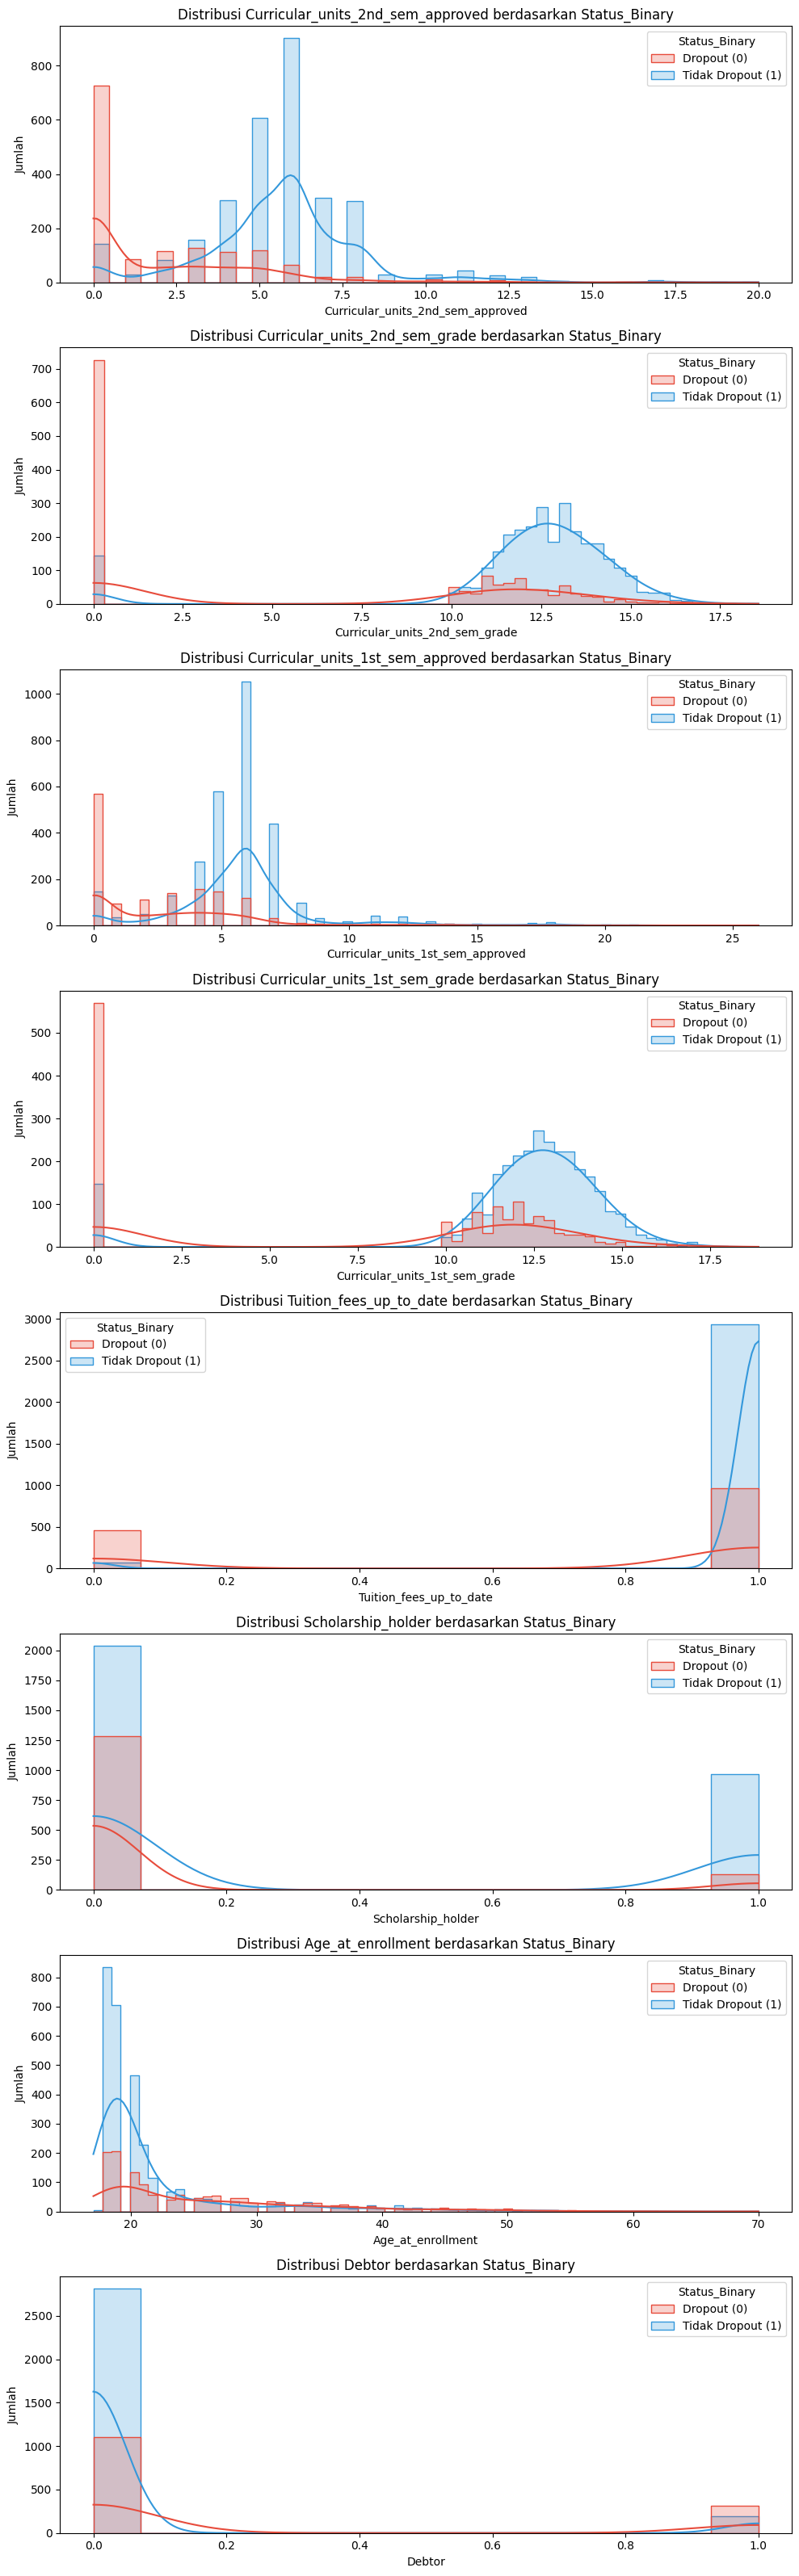

In [47]:
# Distribusi Data Numerik
palette_colors = {0: '#e74c3c', 1: '#3498db'}

nrows = len(important_numerical)
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(10, 4 * nrows), sharey=False)

if nrows == 1:
    axes = [axes]

for i, feature in enumerate(important_numerical):
    ax = axes[i]
    sns.histplot(
        data=eda_df,
        x=feature,
        hue='Status_Binary',
        kde=True,
        element='step',
        stat='count',
        common_norm=False,
        palette=palette_colors,
        ax=ax
    )

    ax.set_title(f'Distribusi {feature} berdasarkan Status_Binary', fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel('Jumlah')

    legend = ax.get_legend()
    if legend:

        new_labels = ['Dropout (0)', 'Tidak Dropout (1)']
        for t, l in zip(legend.texts, new_labels):
            t.set_text(l)

plt.tight_layout()
plt.show()

**Kelompok Akademik**

Fitur-fitur yang terkait dengan performa akademik (`Curricular_units_..._approved` dan `Curricular_units_..._grade`) menunjukkan **kemampuan prediksi yang paling kuat**.

* **Observasi:** Pada keempat grafik ini, pemisahan antara kedua kelompok sangatlah drastis dan jelas.
    * Distribusi kelompok **Dropout (merah)** memiliki puncak yang sangat tinggi di nilai **nol**. Ini berarti mayoritas absolut dari mahasiswa yang *dropout* adalah mereka yang tidak lulus SKS sama sekali atau mendapatkan nilai nol di semester awal.
    * Sebaliknya, distribusi kelompok **Tidak Dropout (biru)** membentuk kurva yang lebih normal dengan puncak di nilai yang sehat (sekitar 6 SKS lulus dan nilai rata-rata 13-14).
* **Insight:** Performa akademik di semester 1 dan 2 adalah **sinyal peringatan dini yang paling andal**. Kegagalan untuk lulus SKS atau mendapatkan nilai yang memadai di awal masa studi secara langsung berkorelasi sangat kuat dengan keputusan untuk *dropout*.

**Kelompok Finansial**

Fitur `Tuition_fees_up_to_date` (pembayaran UKT) dan `Debtor` (status utang) juga menunjukkan pemisahan yang jelas.

* **Observasi:**
    * Pada kategori `Tuition_fees_up_to_date = 1` (lunas), distribusi didominasi oleh mahasiswa yang Tidak Dropout. Sebaliknya, pada kategori `0` (menunggak), proporsi mahasiswa *dropout* jauh lebih besar.
    * Pola serupa terjadi pada `Debtor`, di mana status sebagai penunggak utang (`Debtor = 1`) didominasi oleh mahasiswa *dropout*.
* **Insight:** Stabilitas finansial adalah faktor pembeda yang signifikan. Mahasiswa yang kesulitan secara finansial (tercermin dari tunggakan) memiliki kecenderungan yang jauh lebih tinggi untuk *dropout*.

**Kelompok Demografis dan Status Khusus** 🎓

Fitur `Age_at_enrollment` (usia) dan `Scholarship_holder` (penerima beasiswa) memberikan konteks demografis yang penting.

* **Observasi:**
    * **`Age_at_enrollment`**: Meskipun ada tumpang tindih, puncak distribusi kelompok **Dropout (merah)** sedikit lebih ke kanan (lebih tua) dan memiliki "ekor" yang lebih gemuk ke arah usia yang lebih tinggi. Sebaliknya, puncak kelompok **Tidak Dropout (biru)** sangat tajam di sekitar usia 18-20 tahun.
    * **`Scholarship_holder`**: Pada kategori penerima beasiswa (`Scholarship_holder = 1`), distribusi hampir sepenuhnya didominasi oleh mahasiswa yang Tidak Dropout.
* **Insight:** Usia yang lebih tua saat mendaftar meningkatkan risiko *dropout*. Sementara itu, menjadi penerima beasiswa adalah indikator yang sangat kuat bahwa seorang mahasiswa akan berhasil menyelesaikan studinya, kemungkinan karena kombinasi dari kemampuan akademis yang terbukti dan dukungan finansial.



Persentase Status Mahasiswa Berdasarkan Status Beasiswa:
                         Dropout (%)  Not Dropout (%)
Tidak Menerima Beasiswa        38.71            61.29
Menerima Beasiswa              12.19            87.81


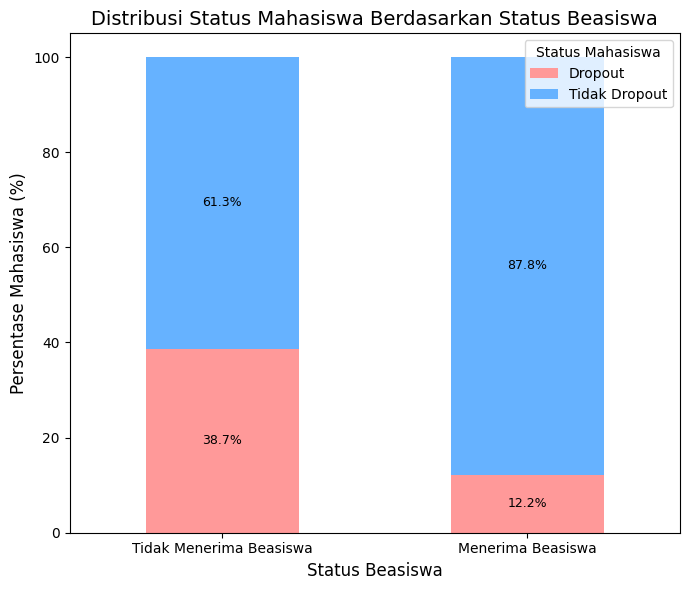

In [48]:
cross_tab = pd.crosstab(eda_df['Scholarship_holder'], eda_df['Status_Binary'], normalize='index') * 100
cross_tab.columns = ['Dropout (%)', 'Not Dropout (%)']
cross_tab.index = ['Tidak Menerima Beasiswa', 'Menerima Beasiswa']

print("\nPersentase Status Mahasiswa Berdasarkan Status Beasiswa:")
print(cross_tab.round(2))

ax = cross_tab.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 6),
    color=['#FF9999', '#66B2FF']
)

plt.title("Distribusi Status Mahasiswa Berdasarkan Status Beasiswa", fontsize=14)
plt.ylabel("Persentase Mahasiswa (%)", fontsize=12)
plt.xlabel("Status Beasiswa", fontsize=12)
plt.xticks(rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Dropout', 'Tidak Dropout'], title="Status Mahasiswa", loc='upper right', bbox_to_anchor=(1.0, 1.0))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Insight:
Bagi yang menerima beasiswa memiliki peluang dropout yang rendah

Korelasi terhadap Status_Binary:
Curricular_units_2nd_sem_grade       0.572
Curricular_units_2nd_sem_approved    0.570
Curricular_units_1st_sem_grade       0.481
Curricular_units_1st_sem_approved    0.479
Curricular_units_2nd_sem_enrolled    0.142
Curricular_units_1st_sem_enrolled    0.125
Name: Status_Binary, dtype: float64




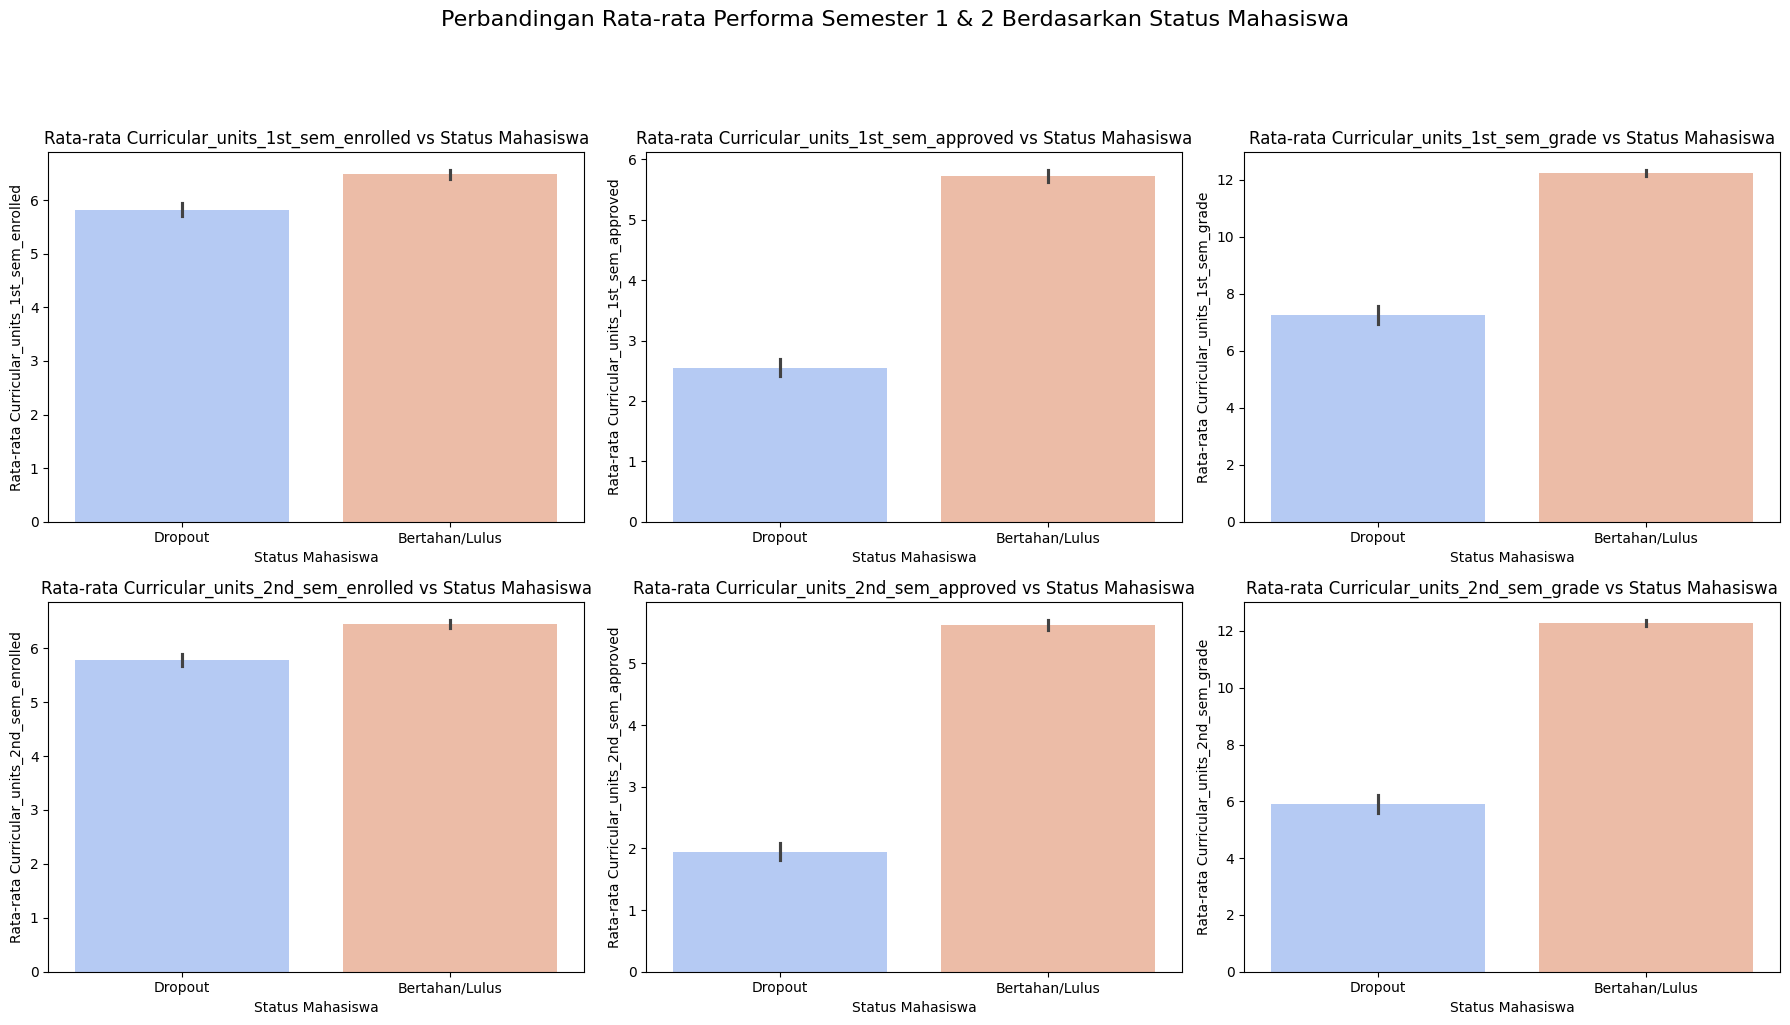

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

semester_features = [
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

correlation_df = clean_df[semester_features + ['Status_Binary']].corr()['Status_Binary'].drop('Status_Binary')
print("Korelasi terhadap Status_Binary:")
print(correlation_df.sort_values(ascending=False).round(3))
print("\n" + "="*50 + "\n")

num_features = len(semester_features)

nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(semester_features):
    ax = axes[i]

    # Perbaikan: Menggunakan clean_df yang memiliki kolom 'Status_Binary'
    sns.barplot(data=clean_df, x='Status_Binary', y=col, ax=ax, palette='coolwarm', hue='Status_Binary', legend=False)

    ax.set_title(f'Rata-rata {col} vs Status Mahasiswa', fontsize=12)
    ax.set_xlabel("Status Mahasiswa")
    ax.set_ylabel(f"Rata-rata {col}")

    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Dropout", "Bertahan/Lulus"])

plt.suptitle("Perbandingan Rata-rata Performa Semester 1 & 2 Berdasarkan Status Mahasiswa", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Insight :

* Performa Akademik sebagai Prediktor Utama: Keberhasilan akademik, terutama yang tercermin dari jumlah mata kuliah yang berhasil dilulusi (approved) dan nilai rata-rata (grade), adalah kontributor utama terhadap risiko dropout. Mahasiswa yang gagal mencapai standar akademik tertentu di semester awal memiliki risiko dropout yang jauh lebih tinggi.
* Konsistensi Performa: Pola performa yang buruk (nilai rendah, sedikit mata kuliah yang disetujui) yang dimulai di semester pertama cenderung berlanjut atau memburuk di semester kedua bagi mahasiswa yang pada akhirnya dropout.
* Bukan Hanya "Mengambil" tapi "Menyelesaikan": Jumlah mata kuliah yang diambil (enrolled) tidak membedakan kedua kelompok secara signifikan, namun jumlah mata kuliah yang disetujui (approved) dan nilai yang didapatkan sangat membedakan. Ini menunjukkan bahwa kapasitas untuk menyelesaikan dan berhasil dalam studi, bukan hanya mendaftar, adalah kuncinya.

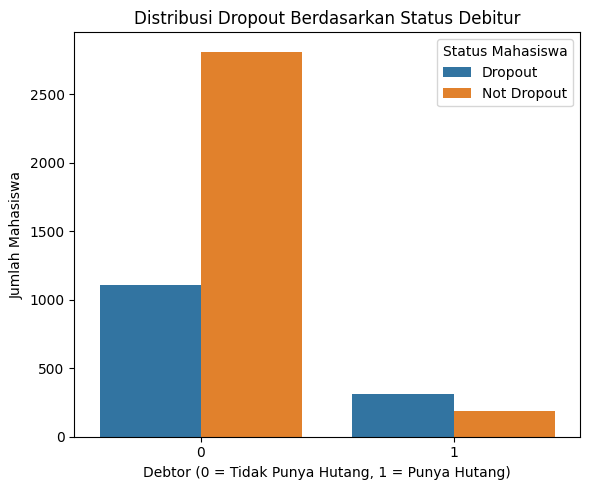

Korelasi antara Debtor dan Status_Binary: -0.229


In [49]:
# 1. Visualisasi Distribusi Debtor vs Dropout
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=eda_df, x='Debtor', hue='Status_Binary')
plt.title("Distribusi Dropout Berdasarkan Status Debitur")
plt.xlabel("Debtor (0 = Tidak Punya Hutang, 1 = Punya Hutang)")
plt.ylabel("Jumlah Mahasiswa")
plt.legend(title="Status Mahasiswa", labels=["Dropout", "Not Dropout"])
plt.tight_layout()
plt.show()

# 2. Korelasi Debtor vs Status_Binary
correlation = eda_df[['Debtor', 'Status_Binary']].corr().iloc[0, 1]
print(f"Korelasi antara Debtor dan Status_Binary: {correlation:.3f}")


# Modeling

In [52]:
df_final

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Application_mode_2,Application_mode_5,...,Previous_qualification_12,Previous_qualification_14,Previous_qualification_15,Previous_qualification_19,Previous_qualification_38,Previous_qualification_39,Previous_qualification_40,Previous_qualification_42,Previous_qualification_43,Status_Binary
0,0,0.000000,0,0.000000,1,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,13.666667,6,14.000000,0,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000000,0,0.000000,0,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,12.400000,6,13.428571,1,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,13.000000,5,12.333333,1,0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,5,12.666667,5,13.600000,1,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4420,2,11.000000,6,12.000000,0,0,18,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4421,1,13.500000,7,14.912500,1,1,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4422,5,12.000000,5,13.800000,1,1,20,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Insight : Gunakan `df_final` untuk melatih model (berisikan fitur kategorial yang sudah di encoding)

## Oversampling Class

In [53]:
# Pisahkan fitur dan target
X = df_final.drop(columns='Status_Binary')
y = df_final['Status_Binary']

# Terapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_oversampled))

Distribusi setelah SMOTE: Counter({0: 3003, 1: 3003})


Insight:
Kode ini bertujuan untuk **mengatasi masalah data yang tidak seimbang** dengan menggunakan teknik SMOTE (*Synthetic Minority Over-sampling Technique*).

Secara rinci:
1.  **Pemisahan Fitur dan Target**: Kode memisahkan data menjadi dua bagian: `X` (fitur-fitur prediktor) dan `y` (kolom target `Status_Binary` yang ingin diprediksi).
2.  **Penerapan SMOTE**: Metode SMOTE diterapkan untuk **menyeimbangkan jumlah data** pada setiap kelas target. SMOTE bekerja dengan cara membuat sampel-sampel baru yang sintetis (buatan) untuk kelas minoritas (kemungkinan kelas 'Dropout') hingga jumlahnya sama dengan kelas mayoritas.
3.  **Hasil Akhir**: Hasilnya adalah `X_oversampled` dan `y_oversampled`, sebuah set data baru yang seimbang, yang akan mencegah model menjadi bias dan lebih baik dalam mengenali pola dari kelas minoritas.

## Split Dataset

In [54]:
# Split data oversampled menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.2, stratify=y_oversampled, random_state=42
)

## Scaling Fitur Numerik

In [55]:
# Identifikasi fitur numerik dari 10 fitur penting
numerical_cols = [
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
    'Debtor'
]

# Inisialisasi scaler dan transformasi data
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Insight:

Penerapan `StandardScaler` pada kode ini adalah langkah krusial untuk **menyamakan skala semua fitur numerik**, yang bertujuan agar fitur dengan rentang nilai besar (seperti `Age_at_enrollment`) tidak secara keliru mendominasi fitur dengan rentang nilai kecil (seperti `Curricular_units_grade`). Dengan mengubah semua fitur ke skala yang seragam, kinerja dan kecepatan banyak algoritma machine learning dapat meningkat secara signifikan. Proses ini dilakukan dengan benar, di mana scaler "belajar" parameter skala hanya dari data latih (`fit_transform`) dan kemudian menerapkan transformasi yang sama pada data uji (`transform`) untuk mencegah kebocoran data dan memastikan evaluasi model yang adil dan akurat.

## Hypermater Tuning Model

In [56]:
# Definisi model dan parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluasi model terbaik
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       601
           1       0.88      0.92      0.90       601

    accuracy                           0.90      1202
   macro avg       0.90      0.90      0.90      1202
weighted avg       0.90      0.90      0.90      1202



Insight:

Kode ini mengimplementasikan proses **optimasi hyperparameter** untuk model `RandomForestClassifier` menggunakan metode `GridSearchCV`, yang wawasannya adalah untuk menemukan versi model dengan komposisi terbaik secara sistematis, alih-alih menggunakan pengaturan default. Tujuannya adalah untuk secara metodis mengidentifikasi kombinasi parameter (`n_estimators`, `max_depth`, `min_samples_split`) yang paling optimal dari sebuah `param_grid` yang telah didefinisikan. Proses pencarian ini divalidasi menggunakan 3-fold cross-validation (`cv=3`) guna memastikan bahwa performa model yang terpilih bersifat andal dan tidak bias terhadap pembagian data tertentu. Setelah menemukan set parameter terbaik, model tersebut (`best_estimator_`) dievaluasi pada data uji yang terpisah untuk menghasilkan `Classification Report`, yang berfungsi sebagai tolok ukur final dari kemampuan prediktif model yang telah dioptimalkan.

In [57]:
# Definisi model tanpa parameter deprecated
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid search
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluasi model terbaik
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       601
           1       0.88      0.91      0.90       601

    accuracy                           0.89      1202
   macro avg       0.89      0.89      0.89      1202
weighted avg       0.89      0.89      0.89      1202



Insight:

Kode ini mengimplementasikan proses **optimasi hyperparameter** untuk model `XGBClassifier` menggunakan metode `GridSearchCV`, yang wawasannya adalah untuk menemukan versi model dengan performa paling unggul secara sistematis, alih-alih menggunakan pengaturan default. Tujuannya adalah untuk secara metodis mengidentifikasi kombinasi parameter (`n_estimators`, `max_depth`, `learning_rate`) yang paling optimal dari sebuah `param_grid` yang telah ditentukan. Proses pencarian ini divalidasi menggunakan 3-fold cross-validation (`cv=3`) guna memastikan bahwa performa model yang terpilih bersifat andal dan tidak bias terhadap pembagian data tertentu. Setelah menemukan set parameter terbaik, model tersebut (`best_estimator_`) dievaluasi pada data uji yang terpisah untuk menghasilkan `Classification Report`, yang berfungsi sebagai tolok ukur final dan paling jujur dari kemampuan prediktif model yang telah dioptimalkan.

In [58]:
# Definisi model dan parameter grid
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluasi model terbaik
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       601
           1       0.85      0.83      0.84       601

    accuracy                           0.84      1202
   macro avg       0.84      0.84      0.84      1202
weighted avg       0.84      0.84      0.84      1202



Insight:

Kode ini mengimplementasikan proses **optimasi hyperparameter** untuk model `DecisionTreeClassifier` menggunakan metode `GridSearchCV`, yang wawasannya adalah untuk menemukan versi model dengan arsitektur terbaik secara sistematis, alih-alih menggunakan pengaturan default. Tujuannya adalah untuk secara metodis mengidentifikasi kombinasi parameter (`max_depth`, `min_samples_split`, `criterion`) yang paling optimal dari sebuah `param_grid` yang telah didefinisikan. Proses pencarian ini divalidasi menggunakan 3-fold cross-validation (`cv=3`) guna memastikan bahwa performa model yang terpilih bersifat andal dan tidak bias terhadap pembagian data tertentu. Setelah menemukan set parameter terbaik, model tersebut (`best_estimator_`) dievaluasi pada data uji yang terpisah untuk menghasilkan `Classification Report`, yang berfungsi sebagai tolok ukur final dari kemampuan prediktif model yang telah dioptimalkan.

# Evaluasi

=== Random Forest ===
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8985024958402662
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       601
           1       0.88      0.92      0.90       601

    accuracy                           0.90      1202
   macro avg       0.90      0.90      0.90      1202
weighted avg       0.90      0.90      0.90      1202



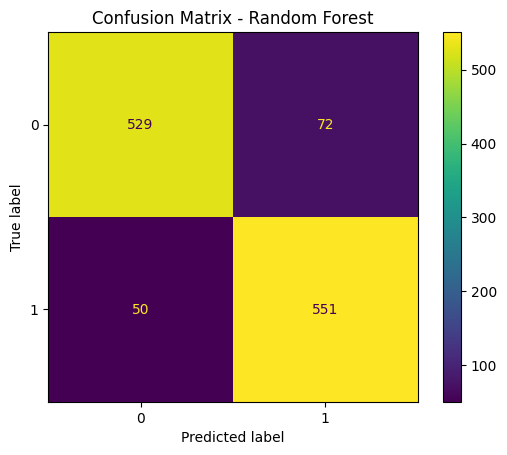


=== XGBoost ===
Best Params: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.8943427620632279
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       601
           1       0.88      0.91      0.90       601

    accuracy                           0.89      1202
   macro avg       0.89      0.89      0.89      1202
weighted avg       0.89      0.89      0.89      1202



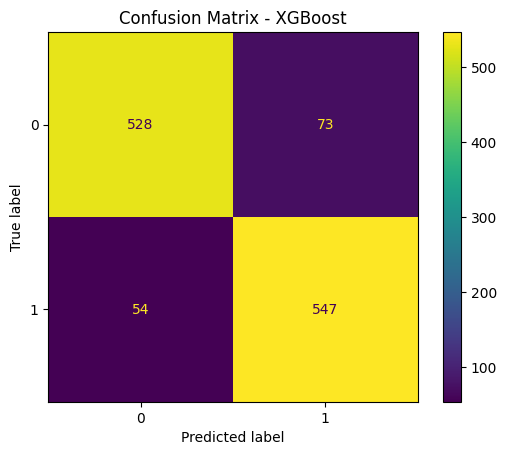


=== Decision Tree ===
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.8394342762063228
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       601
           1       0.85      0.83      0.84       601

    accuracy                           0.84      1202
   macro avg       0.84      0.84      0.84      1202
weighted avg       0.84      0.84      0.84      1202



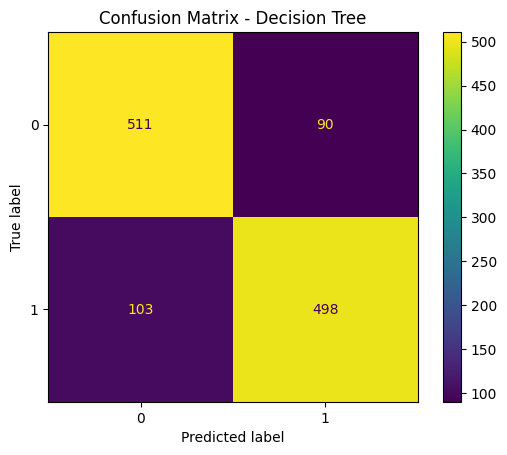


=== Model Performance Comparison ===
Random Forest Accuracy: 0.8985
XGBoost Accuracy     : 0.8943
Decision Tree Accuracy: 0.8394

📌 Rekomendasi: Gunakan model **Random Forest** berdasarkan akurasi tertinggi.


In [59]:
# 1. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("=== Random Forest ===")
print("Best Params:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 2. XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')  # no use_label_encoder
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\n=== XGBoost ===")
print("Best Params:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()

# 3. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt, dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("\n=== Decision Tree ===")
print("Best Params:", dt_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# 4. Perbandingan Akhir
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("\n=== Model Performance Comparison ===")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"XGBoost Accuracy     : {acc_xgb:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

# Rekomendasi berdasarkan akurasi
best_model_name = max(
    [("Random Forest", acc_rf), ("XGBoost", acc_xgb), ("Decision Tree", acc_dt)],
    key=lambda x: x[1]
)[0]

print(f"\n📌 Rekomendasi: Gunakan model **{best_model_name}** berdasarkan akurasi tertinggi.")

Insight:

Hasil ini menunjukkan bahwa model Random Forest dan XGBoost memiliki performa yang jauh lebih unggul (sekitar 89% akurasi) dibandingkan model Decision Tree (sekitar 83%). Hal ini terjadi karena Random Forest dan XGBoost adalah model ensemble, yang berarti mereka menggabungkan "pendapat" dari ratusan pohon keputusan untuk membuat prediksi yang lebih akurat dan stabil. Berdasarkan akurasi tertinggi, Random Forest adalah pilihan model terbaik untuk memprediksi kelulusan mahasiswa pada kasus ini.

📊 Top 10 Fitur Paling Berpengaruh (Random Forest):
                              Feature  Importance
0   Curricular_units_2nd_sem_approved    0.180337
1      Curricular_units_2nd_sem_grade    0.154975
2   Curricular_units_1st_sem_approved    0.135001
3      Curricular_units_1st_sem_grade    0.120730
4             Tuition_fees_up_to_date    0.083056
6                   Age_at_enrollment    0.081219
5                  Scholarship_holder    0.035841
41                           Gender_1    0.016405
25                         Course_171    0.014883
7                              Debtor    0.014150


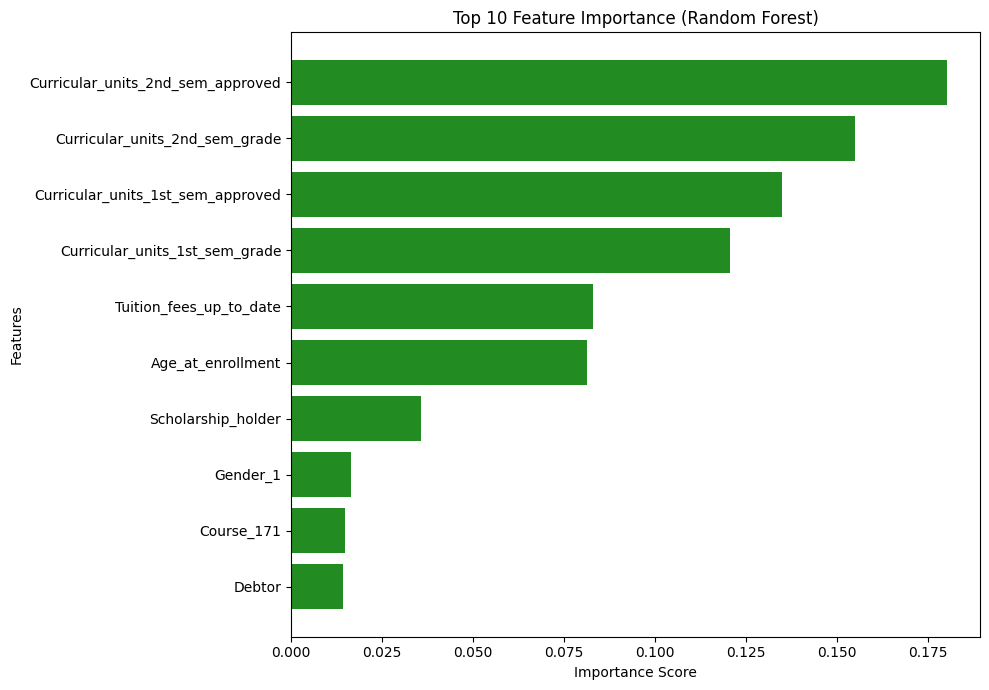

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = best_rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

top_10_features_df = importance_df.head(10)

top_10_features_df.to_csv('10_fitur_paling_penting.csv', index=False)

print("📊 Top 10 Fitur Paling Berpengaruh (Random Forest):")
print(top_10_features_df)

plt.figure(figsize=(10, 7))
plt.barh(top_10_features_df['Feature'], top_10_features_df['Importance'], color='forestgreen')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Insight:


Hasil ini secara jelas menunjukkan bahwa **performa akademik mahasiswa di dua semester pertama** adalah faktor penentu yang paling dominan bagi model Random Forest. Empat fitur teratas (`Curricular_units_..._approved` dan `..._grade`), yang menyumbang lebih dari 50% dari total kekuatan prediksi, menegaskan bahwa keberhasilan di awal perkuliahan adalah prediktor tunggal yang paling penting.

***

Setelah performa akademik, model akan mempertimbangkan **kondisi finansial** (`Tuition_fees_up_to_date`, `Debtor`) dan **latar belakang demografis** (`Age_at_enrollment`, `Gender`) sebagai faktor sekunder yang signifikan. Temuan ini secara kuat mengonfirmasi semua hasil analisis data eksploratif (EDA) sebelumnya, di mana fitur-fitur yang sama terbukti memiliki korelasi dan daya pemisah yang kuat antara mahasiswa yang *dropout* dan yang tidak.

# Save Model

In [72]:
# Save model prediksi
joblib.dump(best_rf, 'rf_model2.pkl')  # ✅ Ini yang benar

['rf_model2.pkl']

# Test Model

In [70]:
# Daftar fitur yang dipilih
important_categorical = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
important_numerical = [
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
    'Debtor'
]

test_df = eda_df.copy()

test_df['Status_Binary'] = clean_df['Status_Binary'].values

test_df = test_df[test_df['Status_Binary'] == 1]
selected_columns = important_categorical + important_numerical + ['Status_Binary']
test_df = test_df[selected_columns].reset_index(drop=True)

test_df.head()

,Application_mode,Course,Gender,Previous_qualification,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Status_Binary
0,International Student (Bachelor),Tourism,Male,Secondary Education - 12th Year of Schooling o...,6,13.666667,6,14.000000,0,0,19,0,1
1,2nd Phase - General Contingent,Journalism and Communication,Female,Secondary Education - 12th Year of Schooling o...,5,12.400000,6,13.428571,1,0,20,0,1
2,Over 23 Years Old,Social Service (Evening Attendance),Female,Secondary Education - 12th Year of Schooling o...,6,13.000000,5,12.333333,1,0,45,0,1
3,Over 23 Years Old,Management (Evening Attendance),Male,Basic Education 3rd Cycle (9th/10th/11th Year)...,5,11.500000,5,11.857143,1,0,50,1,1
4,1st Phase - General Contingent,Nursing,Female,Secondary Education - 12th Year of Schooling o...,8,14.345000,7,13.300000,1,1,18,0,1


In [73]:
import pandas as pd
import joblib

# Load model dan encoder
model = joblib.load("rf_model2.pkl")
encoder = joblib.load("onehot_encoder2.pkl")

# Fitur yang tersedia dalam dataset
important_categorical = ['Application_mode', 'Course', 'Gender', 'Previous_qualification']
important_numerical = [
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
    'Debtor'
]

# Fungsi encoding
def encode_input(df, encoder, cat_feats, num_feats):
    X_cat = encoder.transform(df[cat_feats])
    cat_cols = encoder.get_feature_names_out(cat_feats)
    X_num = df[num_feats].reset_index(drop=True)
    return pd.concat([X_num, pd.DataFrame(X_cat, columns=cat_cols, index=X_num.index)], axis=1)

# Fungsi prediksi dan simpan
def predict_and_save(df, encoder, model):
    actual_status = df["Status_Binary"].copy()
    df = df.drop(columns=["Status_Binary"])

    X_ready = encode_input(df, encoder, important_categorical, important_numerical)

    prediction = model.predict(X_ready)
    proba = model.predict_proba(X_ready)

    index = 2
    print("Hasil Prediksi untuk Baris ke-3:")
    print(df.iloc[index])
    if prediction[index] == 0:
        print(f"\nPrediksi: Mahasiswa akan keluar (Status = 0), kemungkinan keluar: {proba[index][0]:.2%}")
    else:
        print(f"\nPrediksi: Mahasiswa tidak akan keluar (Status = 1), kemungkinan: {proba[index][1]:.2%}")

    df["Status (Actual)"] = actual_status
    df["PredictedStatus"] = prediction
    df["Probability"] = [round(p[0], 4) for p in proba]

    df.to_csv("hasil_prediksi2.csv", index=False)
    print("\nHasil prediksi lengkap disimpan sebagai 'hasil_prediksi2.csv'")

# Jalankan prediksi
predict_and_save(test_df.copy(), encoder, model)

Hasil Prediksi untuk Baris ke-3:
Application_mode                                                     Over 23 Years Old
Course                                             Social Service (Evening Attendance)
Gender                                                                          Female
Previous_qualification               Secondary Education - 12th Year of Schooling o...
Curricular_units_2nd_sem_approved                                                    6
Curricular_units_2nd_sem_grade                                                    13.0
Curricular_units_1st_sem_approved                                                    5
Curricular_units_1st_sem_grade                                               12.333333
Tuition_fees_up_to_date                                                              1
Scholarship_holder                                                                   0
Age_at_enrollment                                                                   45
Debtor    

In [ ]:
!pip freeze > requirements.txt